In [1]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

/var/folders/kn/cwfqjl4564981f1dv75l_gkw0000gn/T/ipykernel_70500/4093729654.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Part 1 – Data Preparation and Preprocessing

### 1.1 Describe the dataset

### Load the dataset using pd.read_csv

In [2]:
data = pd.read_csv('data.csv')

print("The Dataset consists of: ", data.shape[0], " rows and ", data.shape[1], " columuns")
data.head(10)

The Dataset consists of:  318477  rows and  13  columuns


/var/folders/kn/cwfqjl4564981f1dv75l_gkw0000gn/T/ipykernel_70500/2183699286.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


### Use .info() and .describe() to get details of the dataset

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB
None
        LowestSalary  HighestSalary
count  318477.000000  318477.000000
mean       65.813544     114.432342
std 

The amount of Non-Null values in Id and Title column is same as the number of records in dataset. So all the records of the dataset have job posts with an ID and Title. Then the columns with integer values are described. The LowestSalary and Highest Salary columns has integer values. the count, mean, std, min, max values of these two columns were identified.

### No. of records in the dataset

In [4]:
# How many records are there in the dataset? 
print(data.shape[0])

318477


There are 318477 records in the dataset.

### Period covered by the dataset

In [5]:
# Which period does it cover? How many different dates have job postings?

# Convert the date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Earliest and latest dates in the dataset
earliest_date = data['Date'].min()
latest_date = data['Date'].max()

# Unique dates with job postings
num_unique_dates = data['Date'].nunique()

print("Period covered by the dataset:", earliest_date, "to", latest_date)
print("Number of different dates with job postings:", num_unique_dates)

Period covered by the dataset: 2018-10-01 00:00:00+00:00 to 2019-03-13 00:00:00+00:00
Number of different dates with job postings: 163


Period covered by dataset is from 2018-10-01 to 2019-03-13.
There are 163 different dates having job postings.

### Number of unique locations and location with most job postings

In [6]:
# How many locations does the dataset have? Which location has the most job postings?

# Number of unique locations
num_locations = data['Location'].nunique()

# Location with the most job postings
location_counts = data['Location'].value_counts()
most_common_location = location_counts.idxmax() 

print("Number of locations in the dataset:", num_locations)
print("Location with the most job postings:", most_common_location)

Number of locations in the dataset: 65
Location with the most job postings: Sydney


There are 65 unique locations in the dataset. The location with most job postings is Sydney.

### Job sectors and the number of posts

In [7]:
# How many job sectors(job classifications) are there in the dataset? 
# List the name of each sector and its’ total of job postings.

# Number of unique job sectors
num_job_sectors = data['Classification'].nunique()

# Name of each sector and its total number of job postings
job_sector_counts = data['Classification'].value_counts()

print("Number of job sectors in the dataset:", num_job_sectors)
print("Name of each sector and its total number of job postings:")
print(job_sector_counts)

Number of job sectors in the dataset: 30
Name of each sector and its total number of job postings:
Classification
Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer

There are 30 job sectors and the total number of job postings in each sector was identified.

### Sub-sectors in favorite job sector and job postings

Favorite job sector chosen was Information & Communication Technology

In [8]:
# Choose your favorite job sector : Information & Communication Technology,
# How many sub-sectors are there in that sector? 
# List the name of each sub-sector and its’ job posting number

sector_data = data[data['Classification'] == "Information & Communication Technology"]

# Number of unique sub-sectors within the favorite sector
num_sub_sectors = sector_data['SubClassification'].nunique()

# List of name of each sub-sector and its total number of job postings
sub_sector_counts = sector_data['SubClassification'].value_counts()

print("Number of sub-sectors in the Information & Communication Technology sector:", num_sub_sectors)
print("\nName of each sub-sector and its total number of job postings:")
print(sub_sector_counts)

Number of sub-sectors in the Information & Communication Technology sector: 22

Name of each sub-sector and its total number of job postings:
SubClassification
Developers/Programmers                   4211
Business/Systems Analysts                2986
Programme & Project Management           2413
Architects                               1548
Engineering - Software                   1437
Help Desk & IT Support                   1374
Networks & Systems Administration        1194
Consultants                              1149
Other                                     997
Testing & Quality Assurance               831
Security                                  774
Management                                746
Engineering - Network                     552
Database Development & Administration     551
Web Development & Production              452
Sales - Pre & Post                        449
Product Management & Development          376
Telecommunications                        357
Team Leaders

Favorite sector(Classification) was chosen as Information & Communication Technology. This sector has 22 sub-sectors. The number of job postings of each of these sub-sectors were identified.

### Salary ranges and their Job postings

In [9]:
# List the salary ranges and their total of job postings.
data['SalaryRange'] = data['LowestSalary'].astype(str) + ' - ' + data['HighestSalary'].astype(str)
print("Salary Ranges and Total Job Postings:")
print(data['SalaryRange'].value_counts())

Salary Ranges and Total Job Postings:
SalaryRange
0 - 30       62639
40 - 50      34436
70 - 80      28712
60 - 70      28499
100 - 120    27673
50 - 60      27027
150 - 200    25841
120 - 150    24514
80 - 100     24249
30 - 40      23476
200 - 999    11411
Name: count, dtype: int64


### Job Types and Highest and Lowest Salary of them.

In [10]:
# List the job types. In each job type, what are the lowest salary and highest salary?

# Group the data by job type and calculate the minimum and maximum salaries
salary_ranges = data.groupby('JobType').agg({'LowestSalary': 'min', 'HighestSalary': 'max'})

# Print the result
print(salary_ranges)

                 LowestSalary  HighestSalary
JobType                                     
Casual/Vacation             0            999
Contract/Temp               0            999
Full Time                   0            999
Part Time                   0            999


### 1.2 Normalize and clean data. 

### Calculate average salary of each job type

In [11]:
# The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. 
# You should calculate the “AverageSalary” for each job.

# Calculate the average salary for each job type
data['AverageSalary'] = (data['HighestSalary'] + data['LowestSalary']) / 2

# Group the data by job type and calculate the average salary
average_salary_by_job_type = data.groupby('JobType')['AverageSalary'].mean()

# Print the result
print("Average salary for each job type:")
print(average_salary_by_job_type)

Average salary for each job type:
JobType
Casual/Vacation     49.987754
Contract/Temp      130.208140
Full Time           89.146359
Part Time           54.661056
Name: AverageSalary, dtype: float64


The average salary of each job type was identified by getting the mean of average salary in each job post and grouped by the job type.

### Cleaning the ID Column

Extracted the 8-digit numbers using regex pattern and the old id was replaced by the extracted id.

In [12]:
# The raw dataset values of the "Id" column had inconsistencies in their
# representation. The Id values should have 8 number long integers only. Write code
# to remove unnecessary characters.

# Extract 8-digit numbers using regex pattern to extract 8-digit numbers and replace
data.dropna(subset=['Id'], inplace=True)
data['Id'] = data['Id'].str.extract(r'(\d{8})')

### Removing time from date column

The date was extracted from the "Date" column and assigned back to it.

In [13]:
# The "Date" column is represented in a format that contained both date and time
# information. However, the time is not correct and should be removed

data['Date'] = data['Date'].dt.date

### Change type of Id column to numeric and Date to DateTime

In [14]:
# Change type of “Id” column to numeric and change type of “Date” column to DateTime

data['Id'] = pd.to_numeric(data['Id'])
data['Date'] = pd.to_datetime(data['Date'])

### Finding and Removing duplicates

In [15]:
# Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it
print("Rows in dataset with duplicates:", data.shape[0])

duplicate_rows = data[data.duplicated()]

print("Number of duplicated rows:", duplicate_rows.shape[0])

# Keep only the first occurrence of each duplicated row:
data.drop_duplicates(inplace=True, keep='first')

print("Rows in dataset without duplicates:", data.shape[0])

Rows in dataset with duplicates: 318477
Number of duplicated rows: 4265
Rows in dataset without duplicates: 314212


There were 318477 records initially in the dataset. the .drop_duplicates() function was used to remove duplicate records while keeping the first record only. 4265 duplicates were identified. After removing these duplicates, the number of records in dataset is 314212.

### Check and Visualize missing data in columns

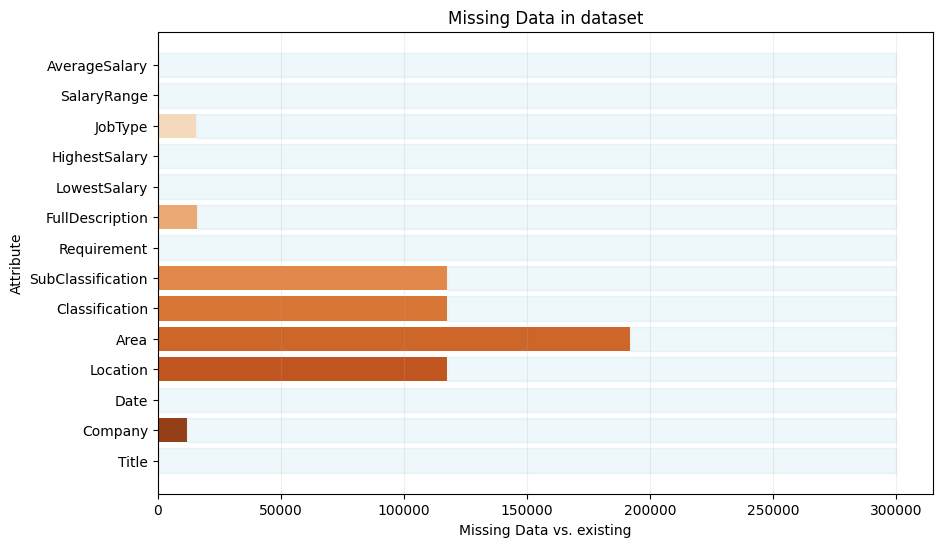

In [16]:
# Check missing data and visualize them in a corresponding chart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Check for missing data
missing_data = data.isnull().sum()
missing_data = missing_data[1:]
missing_data = missing_data[::-1]

#Visualize
n_colors = len(missing_data)
palette = sns.color_palette("Oranges_r", n_colors=n_colors)[::-1]

plt.figure(figsize=(10, 6))

plt.grid(axis='x', linestyle='-', alpha=0.2)
plt.grid(axis='y', linestyle='-', alpha=0.2)

ax = sns.barplot(x=missing_data.values, y=missing_data.index, hue=missing_data.index, palette=palette)

max_width = max(missing_data.values)
for p in ax.patches:
    width = p.get_width()
    plt.fill_betweenx([p.get_y(), p.get_y() + p.get_height()], width, 300000, color='lightblue', alpha=0.2)
    
plt.xlabel('Missing Data vs. existing')
plt.ylabel('Attribute')
plt.title('Missing Data in dataset')
plt.show()

## Part 2 – Data Understanding.

### Job Distribution by Average Salary

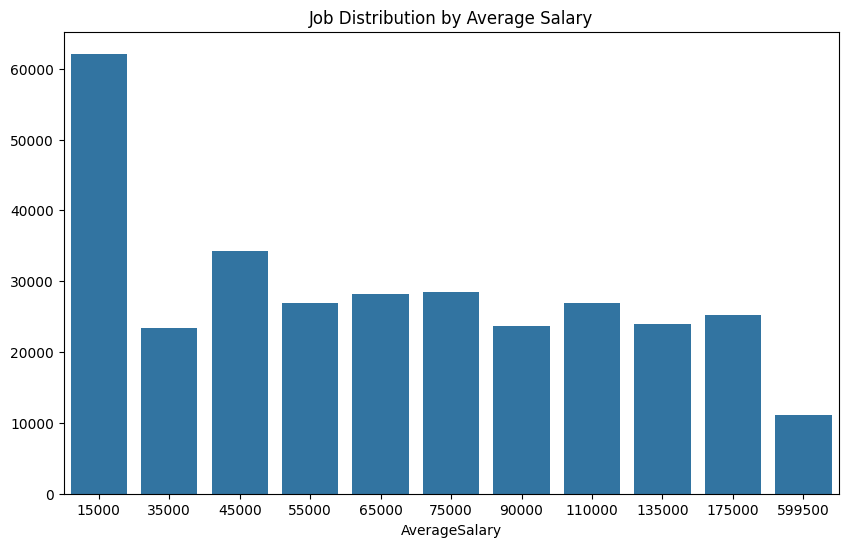

In [17]:
# Get the salary ranges using “AverageSalary”, the total jobs of each range and display
# them in the bar chart

# Calculate job counts and average salaries
job_counts = data['AverageSalary'].value_counts().sort_index()

# Multiply the index by 1000
job_counts.index *= 1000
job_counts.index = job_counts.index.astype(int)

# Plot the vertical bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.title('Job Distribution by Average Salary')

plt.show()

### Pie Chart for job types and their posts

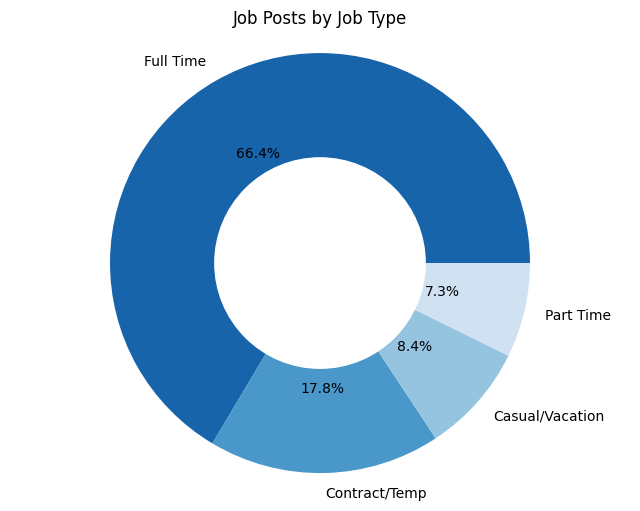

In [18]:
# Display the list of job types and the number of jobs of each type using pie chart.
job_types_count = data['JobType'].value_counts()
blue_palette = sns.color_palette("Blues", n_colors=len(job_types_count))
blue_palette.reverse()
plt.figure(figsize=(8, 6))
plt.pie(job_types_count, labels=job_types_count.index, autopct='%1.1f%%',colors=blue_palette)
plt.title('Job Posts by Job Type')
plt.axis('equal') 
centre_circle = plt.Circle((0, 0), 0.50, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(centre_circle)
plt.show()

By analyzing the pie chart, we can understand that the job market is heavily skewed towards full-time employment, indicating a preference for stable, long-term roles by both employers and employees. However, the presence of a significant number of contract/temporary jobs points to a flexible labor market that can adapt to changing demands and project-based work. Casual/vacation and part-time positions, while less prevalent, remain important for specific worker groups and short-term employer needs. This distribution provides valuable insights into where job seekers can find opportunities and what types of employment are most in demand in the provided dataset.

### Job sectors and their number of job posts

/var/folders/kn/cwfqjl4564981f1dv75l_gkw0000gn/T/ipykernel_70500/2434553691.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Classification', data=data, order=data['Classification'].value_counts().index, palette=heat_colors)


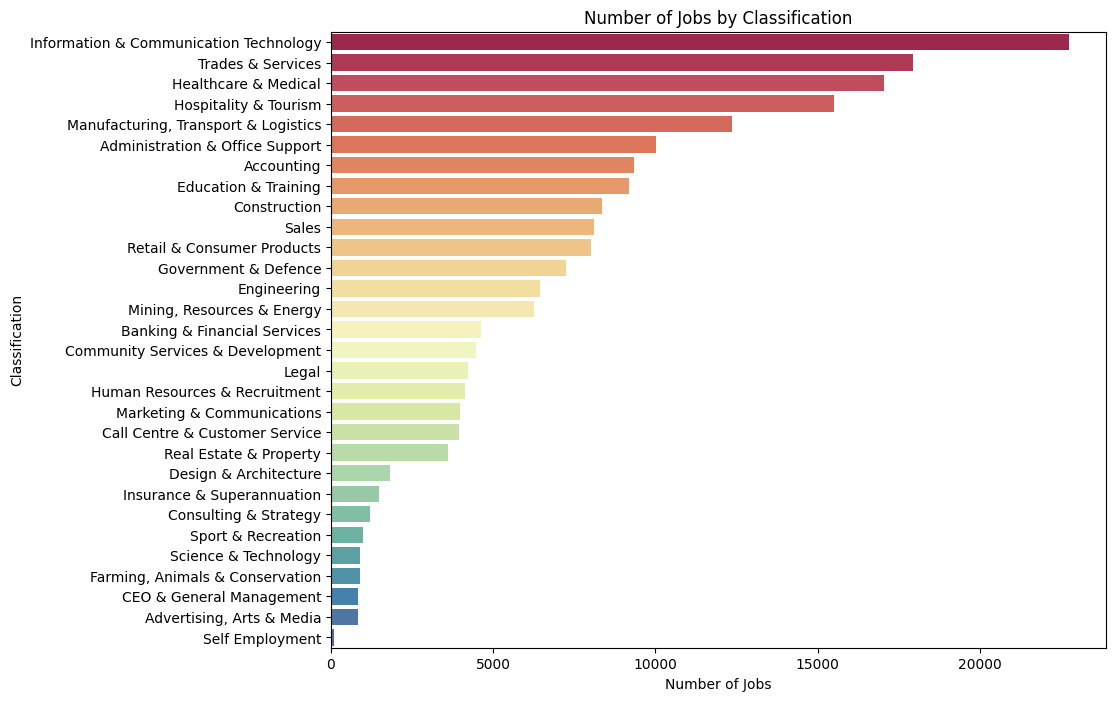

In [19]:
# Display the list of job sectors and the number of jobs of each type using horizontal bar chart

heat_colors = sns.color_palette("Spectral",n_colors=data['Classification'].nunique())

plt.figure(figsize=(10, 8))
sns.countplot(y='Classification', data=data, order=data['Classification'].value_counts().index, palette=heat_colors)
plt.xlabel('Number of Jobs')
plt.ylabel('Classification')
plt.title('Number of Jobs by Classification')
plt.show()

This analysis provides a comprehensive overview of job market dynamics, showcasing where the most opportunities lie across different sectors and highlighting the demand for specific roles and expertise. Accordingly, ICT sector has the highest demand for jobs than any other sector in the dataset, followed by trades and services, healthcare and medical, hospitality and tourism, etc.. It is also visible that self employment has the least amount of jobs listed compared to the rest of the sectors.

### Market share of favorite location.

Sydney was chosen as the location

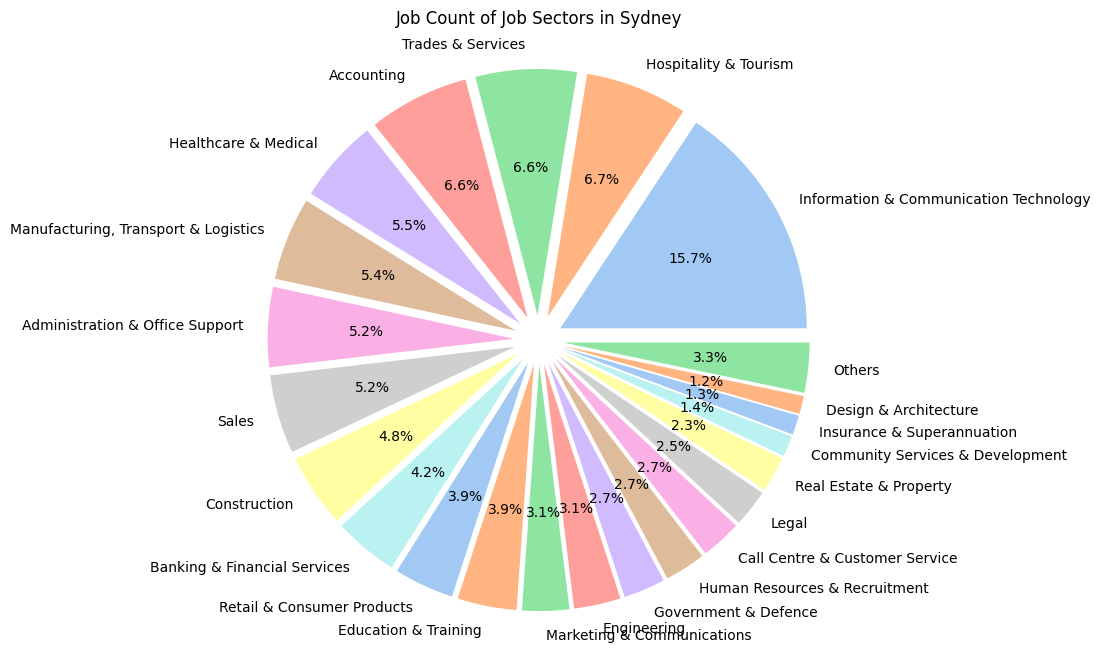

In [20]:
# Choose your favorite location. Visualize the market share of that location in pie chart.

sydney_data = data[data['Location'] == 'Sydney']

# Calculate job count for each job sector
job_sector_counts = sydney_data['Classification'].value_counts()

# Calculate the total job count
total_jobs = job_sector_counts.sum()

# Group sectors with less than 1% of total job count as "Others"
other_threshold = 0.01 * total_jobs
grouped_job_sector_counts = job_sector_counts[job_sector_counts >= other_threshold]
others_count = total_jobs - grouped_job_sector_counts.sum()
grouped_job_sector_counts['Others'] = others_count

labels = grouped_job_sector_counts.index

sizes = grouped_job_sector_counts.values

explode = explode = [0.1] * len(labels) 

palette = sns.color_palette("pastel", len(labels))

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode =explode,  colors=palette)
plt.title('Job Count of Job Sectors in Sydney')
plt.show()

### Visualization of salary distribition

/var/folders/kn/cwfqjl4564981f1dv75l_gkw0000gn/T/ipykernel_70500/400870848.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='HighestSalary', data=top_cities_data, orient='v',   palette=palette)


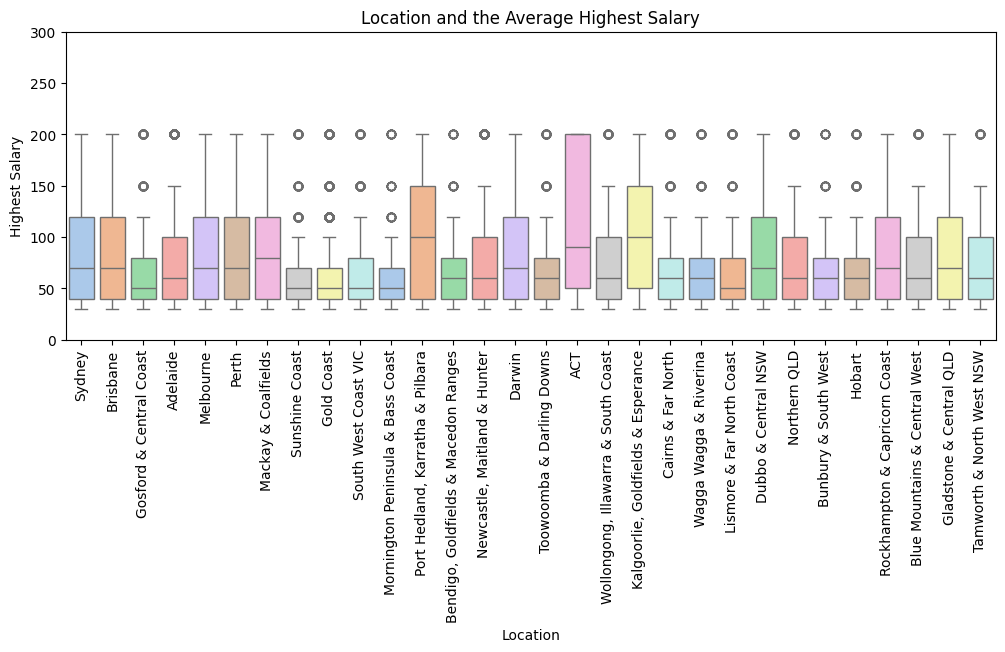

In [21]:
# Can you find the salary distribution for the top 30 cities for the number of job postings?
# Visualize them in the boxplot chart.

city_job_counts = data['Location'].value_counts()

top_cities = city_job_counts.head(30).index

# Filter the dataset to include only the job postings from the top 30 cities
top_cities_data = data[data['Location'].isin(top_cities)]

palette = sns.color_palette("pastel", 30)


# Visualize the salary distribution for each city
plt.figure(figsize=(12, 4))
sns.boxplot(x='Location', y='HighestSalary', data=top_cities_data, orient='v',   palette=palette)
plt.xlabel('Location')
plt.ylabel('Highest Salary')
plt.title('Location and the Average Highest Salary')
plt.xticks(rotation=90)
plt.ylim(0, 300)
plt.show()

## Part 3 - Data Analysis and Visualisation.

### 1. Analyse by comparison.

Favorite 2 locations will be Sydney and Brisbane for comparison.

### Which city has more jobs and the job types in each city

In [22]:
# Which city has more job? How many jobs each type (casual, fulltime, etc.) are there
# in each city?

sydney_data = data[data['Location'] == 'Sydney']
brisbane_data = data[data['Location'] == 'Brisbane']

# Number of job postings in each city
sydney_job_count = len(sydney_data)
brisbane_job_count = len(brisbane_data)

# Count of each job type in each city
sydney_job_types_count = sydney_data['JobType'].value_counts()
brisbane_job_types_count = brisbane_data['JobType'].value_counts()

print("Number of jobs in Sydney:", sydney_job_count)
print("Number of jobs in Brisbane:", brisbane_job_count)
print("\nJob types count in Sydney:")
print(sydney_job_types_count)
print("\nJob types count in Brisbane:")
print(brisbane_job_types_count)


Number of jobs in Sydney: 60568
Number of jobs in Brisbane: 21381

Job types count in Sydney:
JobType
Full Time          40480
Contract/Temp      10953
Casual/Vacation     3010
Part Time           2844
Name: count, dtype: int64

Job types count in Brisbane:
JobType
Full Time          12948
Contract/Temp       4100
Casual/Vacation     1882
Part Time           1210
Name: count, dtype: int64


We can see that Sidney has more jobs than Brisbane. Sydney has more jobs for each Job Type and "Full Time" is the job type with most job posts.

### Top 5 sectors and number of jobs in each city

In [23]:
# In each city, which are top 5 job sectors? How many jobs are there in each sector?

brisbane_job_sector_counts = brisbane_data.groupby('Classification').size().reset_index(name='JobCount')
sydney_job_sector_counts = sydney_data.groupby('Classification').size().reset_index(name='JobCount')

# Sort the counts in descending order to find the top 5 job sectors in each city
brisbane_top_job_sectors = brisbane_job_sector_counts.nlargest(5, 'JobCount')
sydney_top_job_sectors = sydney_job_sector_counts.nlargest(5, 'JobCount')

# Display the top 5 job sectors and their job counts in each city
print("Top 5 job sectors in Brisbane:")
print(brisbane_top_job_sectors)
print()
print("Top 5 job sectors in Sydney:")
print(sydney_top_job_sectors)

Top 5 job sectors in Brisbane:
                            Classification  JobCount
17  Information & Communication Technology      2761
29                       Trades & Services      1990
14                    Healthcare & Medical      1818
20    Manufacturing, Transport & Logistics      1666
15                   Hospitality & Tourism      1332

Top 5 job sectors in Sydney:
                            Classification  JobCount
17  Information & Communication Technology      9518
15                   Hospitality & Tourism      4068
29                       Trades & Services      4015
0                               Accounting      4000
14                    Healthcare & Medical      3331


We can see that the top 5 sectors in Sydney and Brisbane are not the same. But the top job sector in both cities is the same which is Information & Communication Technology.

### Top 5 job sectors in a Pie chart for each city

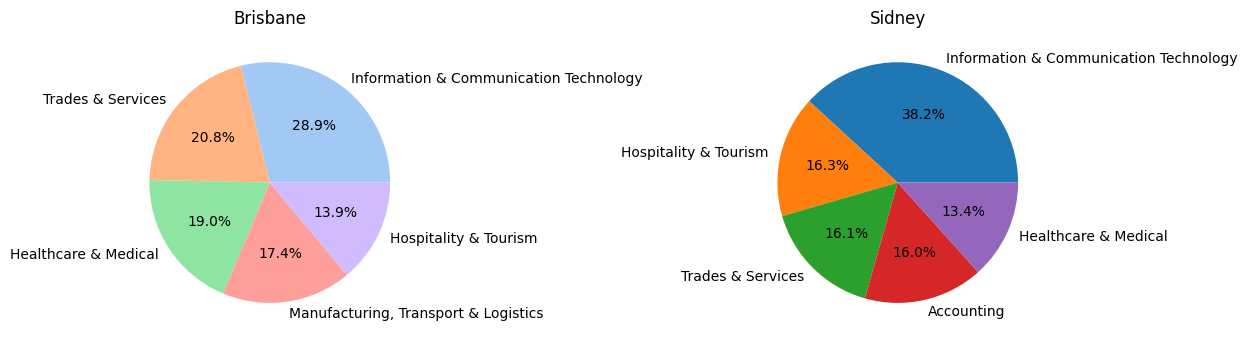

In [24]:
# Visualise the top 5 job sectors in pie chart for each city.
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
palette = sns.color_palette("pastel", len(labels))
axs[0].pie(brisbane_top_job_sectors.JobCount, labels=brisbane_top_job_sectors.Classification, autopct='%1.1f%%', colors= palette)
axs[1].pie(sydney_top_job_sectors.JobCount, labels=sydney_top_job_sectors.Classification, autopct='%1.1f%%')
axs[0].set_title('Brisbane')
axs[1].set_title('Sidney')
plt.tight_layout()
plt.show()

### Job postings of each city by salary range 

In [25]:
# In each city, list the job salary range with the corresponding number of jobs. Which
# city is more well-paid?
print("Salary Ranges and Total Job Postings in Sydney:")
print("Total Number of Job postings",sydney_data.shape[0])
print(sydney_data['SalaryRange'].value_counts())
print('\n')
print("Salary Ranges and Total Job Postings in Brisbane:")
print("Total Number of Job postings",brisbane_data.shape[0])
print(brisbane_data['SalaryRange'].value_counts())
print('\n')

brisbane_salary_mean = brisbane_data.groupby('SalaryRange')['AverageSalary'].mean()
sydney_salary_mean = sydney_data.groupby('SalaryRange')['AverageSalary'].mean()

# Determine the weighted average salary for Brisbane
weighted_average_brisbane = (brisbane_salary_mean * brisbane_data['SalaryRange'].value_counts(normalize=True)).sum()

# Determine the weighted average salary for Sydney
weighted_average_sydney = (sydney_salary_mean * sydney_data['SalaryRange'].value_counts(normalize=True)).sum()

if weighted_average_brisbane > weighted_average_sydney:
    print("Brisbane is more well-paid.")
elif weighted_average_sydney > weighted_average_brisbane:
    print("Sydney is more well-paid.")
else:
    print("Both cities pay equally.")


Salary Ranges and Total Job Postings in Sydney:
Total Number of Job postings 60568
SalaryRange
0 - 30       11718
150 - 200     6249
120 - 150     5679
100 - 120     5552
40 - 50       5354
60 - 70       5278
70 - 80       5019
50 - 60       4850
30 - 40       3964
80 - 100      3716
200 - 999     3189
Name: count, dtype: int64


Salary Ranges and Total Job Postings in Brisbane:
Total Number of Job postings 21381
SalaryRange
0 - 30       4067
40 - 50      2729
60 - 70      2029
50 - 60      1930
100 - 120    1924
70 - 80      1798
150 - 200    1606
30 - 40      1561
120 - 150    1444
80 - 100     1316
200 - 999     977
Name: count, dtype: int64


Sydney is more well-paid.


To find the city which is more well-paid, the salary mean was taken by finding the mean of average salary for each salary range and finding the weighted average salary. The weighted average salary of Sydney was Higher than that of Brisbane. Therefore we can come to a conclusion that Sydney is more well-paid.

### Top 5 companies in each city and their sector

In [26]:
# List top 5 companies in each city? Which sectors do they belong to?

brisbane_company_counts = brisbane_data['Company'].value_counts().reset_index(name='JobCount')
brisbane_company_counts.columns = ['Company', 'JobCount']

sydney_company_counts = sydney_data['Company'].value_counts().reset_index(name='JobCount')
sydney_company_counts.columns = ['Company', 'JobCount']

# Top 5 companies for Brisbane and Sydney
top_5_brisbane_companies = brisbane_company_counts.head(5)
top_5_sydney_companies = sydney_company_counts.head(5)

print("Top 5 Companies in Brisbane:")
for idx, row in top_5_brisbane_companies.iterrows():
    print(f"Company: {row['Company']}, Job Count: {row['JobCount']}, Sector: {brisbane_data[brisbane_data['Company'] == row['Company']]['Classification'].iloc[0]}")

print("\n")
print("Top 5 Companies in Sydney:")
for idx, row in top_5_sydney_companies.iterrows():
    print(f"Company: {row['Company']}, Job Count: {row['JobCount']}, Sector: {sydney_data[sydney_data['Company'] == row['Company']]['Classification'].iloc[0]}")

Top 5 Companies in Brisbane:
Company: Jora Local, Job Count: 314, Sector: Hospitality & Tourism
Company: Hudson, Job Count: 267, Sector: Information & Communication Technology
Company: u&u. Recruitment Partners, Job Count: 265, Sector: Accounting
Company: The University of Queensland, Job Count: 238, Sector: Education & Training
Company: Programmed Skilled Workforce, Job Count: 210, Sector: Manufacturing, Transport & Logistics


Top 5 Companies in Sydney:
Company: Jora Local, Job Count: 1918, Sector: Hospitality & Tourism
Company: Robert Walters, Job Count: 606, Sector: Information & Communication Technology
Company: Design & Build, Job Count: 594, Sector: Construction
Company: Paxus, Job Count: 374, Sector: Information & Communication Technology
Company: Bluefin Resources Pty Limited, Job Count: 352, Sector: Information & Communication Technology


The five companies with most number of job posts were identified in Brisbane and Sydney. The company, job count and the sector of each of these companies were identified.

### Which city is better for employees?



Between 2 cities, which do you think it is better for employees. Explain your choice.

When comparing Brisbane and Sydney, 
We analysed that Sydney is more well-paid. And Sidney has more jobs than Brisbane. So employees have a better chance to find a well-paid job in Syndey.
Therefore, Sydney is better for employees.

### 2. Analyse by time.

### Number of Job Posts by Month

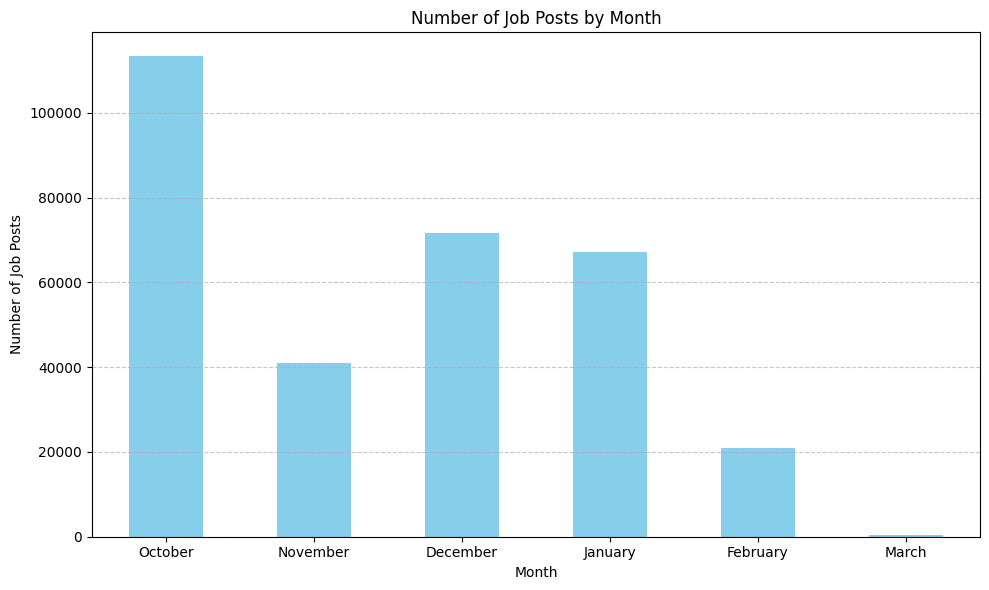

In [27]:
# Visualise the number of job posts by month

data['Month'] = data['Date'].dt.month_name()
job_posts_by_month = data['Month'].value_counts(sort=False)

plt.figure(figsize=(10, 6))
job_posts_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Job Posts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Job Posts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Looking at the above plot, which shows the number of job posts by month, we can make the following observations:
 - Number of jobs posted during the month of October is significantly large compared to the rest of the months.
 - We cannot extract meaningful data from the month of March as the data given in the dataset does not cover the full month.
 - We also can suggest that the most number of jobs are posted during the end and start of the year based on the given dataset. But this is not guaranteed since the dataset does not cover the data for the whole year.

### Number of Job posts by day of week

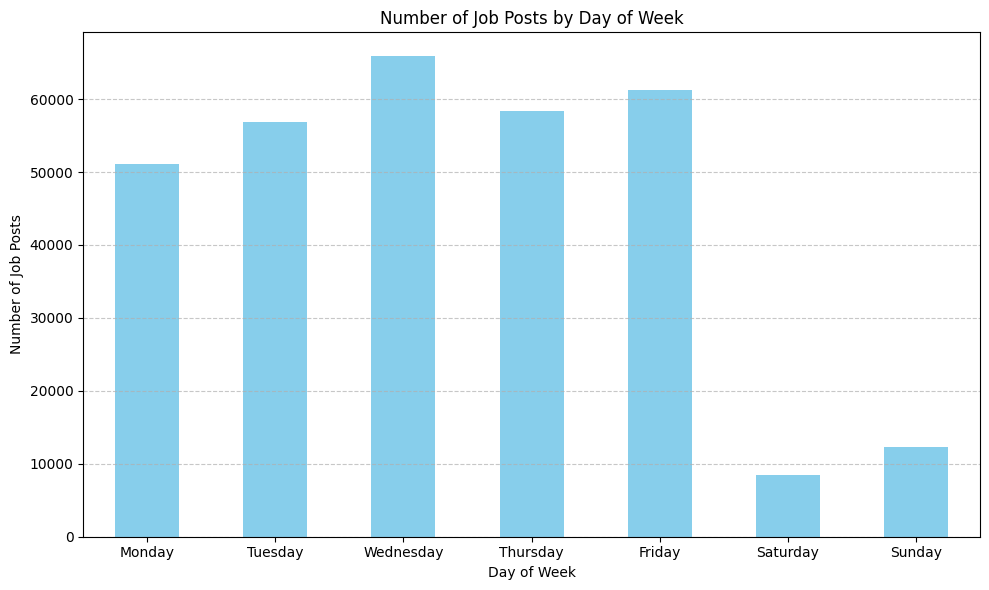

In [28]:
# Visualise the number of job posts by day of week.
data['Day'] = data['Date'].dt.day_name()
job_posts_by_day = data['Day'].value_counts(sort=False)
job_posts_by_day = job_posts_by_day[::-1]

plt.figure(figsize=(10, 6))
job_posts_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of Job Posts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Job Posts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the above chart, which shows the number of job posts by day of week, we can make the following observations:
 - Jobs are mostly posted on Wednesdays, Fridays and Thursdays with Wednesdays being the highest.
 - During the weekend, only a few jobs are posted.

### Number of job posts by day of the month

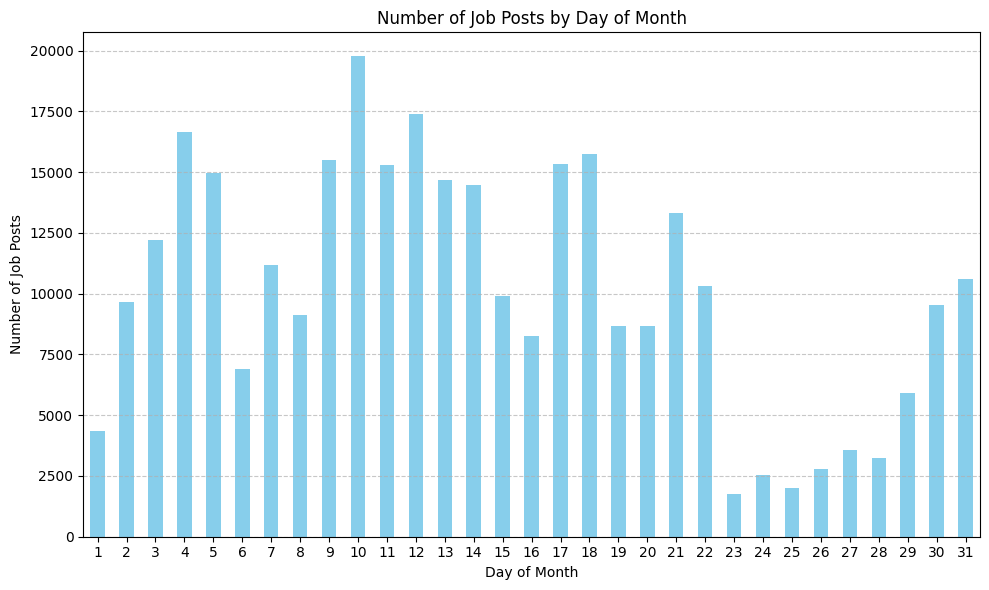

In [29]:
# Visualise the number of job posts by day of the month.

data['DayOfMonth'] = data['Date'].dt.day
job_posts_by_day_of_month = data['DayOfMonth'].value_counts().sort_index(ascending=True)

    
plt.figure(figsize=(10, 6))
job_posts_by_day_of_month.plot(kind='bar', color='skyblue')
plt.title('Number of Job Posts by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Job Posts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The above chart shows the number of jobs posted by day of month. Following observations can be obtained from this:
 - the least number of jobs are posted from 23rd to 28th of each month.
 - the highest number of jobs are posted on the 10th of each month.
 - most number of jobs are posted during the 2nd week of each month and jobs are less likely to be posted in the last month.

### Trending of job postings for top 5 cities

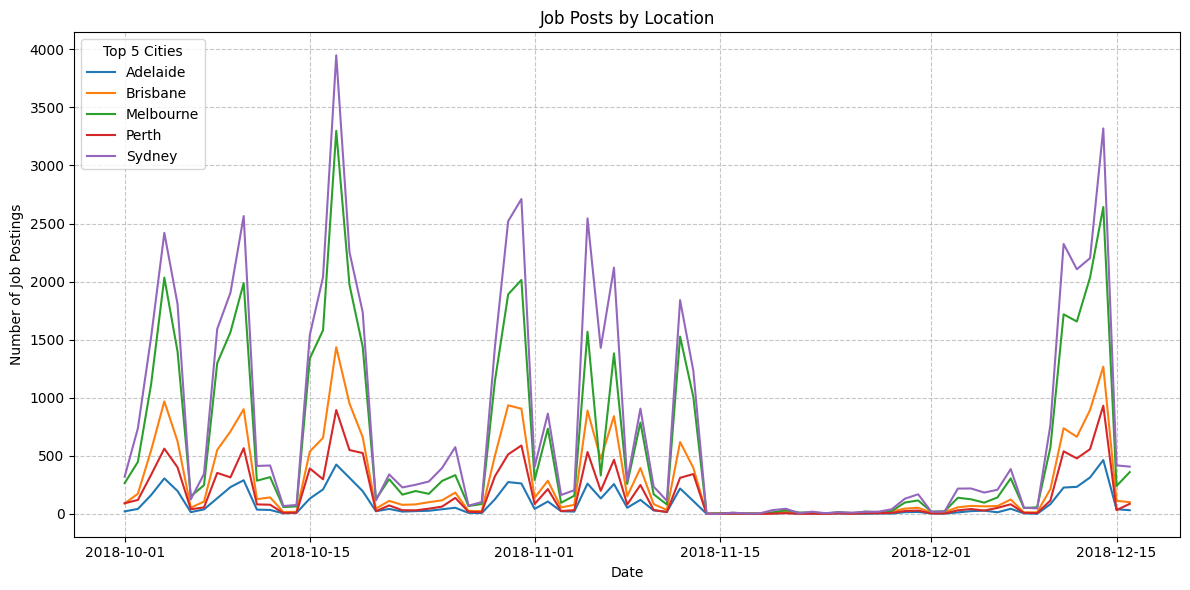

In [30]:
# Visualise trending of the job postings for the big cities

# Top 5 cities
top_cities = data['Location'].value_counts().nlargest(5).index

# dataset of top 5 cities
data_top_cities = data[data['Location'].isin(top_cities)]

# Job postings for each date and city
job_posts_by_date_and_city = data_top_cities.groupby(['Date', 'Location']).size().unstack().fillna(0)

# Plot the data for each city
plt.figure(figsize=(12, 6))
for city in job_posts_by_date_and_city.columns:
    plt.plot(job_posts_by_date_and_city.index, job_posts_by_date_and_city[city], label=city)
sns.set_palette("pastel")
plt.title('Job Posts by Location')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend(title ='Top 5 Cities')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Based on the above charts, provide your observation about the number of job posts
over time. Give your own conclusion.

The number of job postings fluctuates over time for all cities, showing variations in demand for employment opportunities. We can see that Job Posts in each city has reached the peak in the month of October after 15th. Second highest peak was in second week of December. There have been very few job postings in the last 2 weeks of November. Sydney has highest job postings and Adelaide lowest out of these 5 cities. Job postings of the five cities increase and decrease in the same pattern.

## 3. Forecasting and skill extractions.

### Moving average for 7 and 30 days for job posts over time

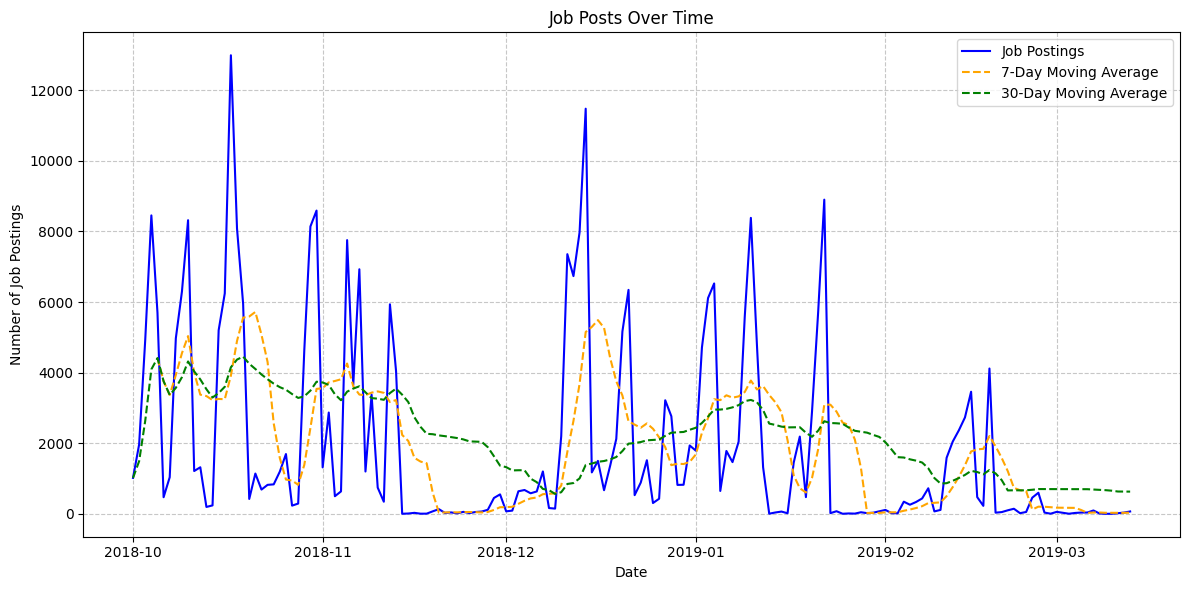

In [31]:
# Using moving average for 7 days and 30 days to predict the number of job postings
# and visualise them in line chart. Which one creates a better prediction? Explain your
# choice.

job_posts_by_date = data.groupby('Date').size()

# Compute the moving averages for 7 days and 30 days
moving_avg_7days = job_posts_by_date.rolling(window=7, min_periods=5).mean()
moving_avg_30days = job_posts_by_date.rolling(window=30,  min_periods=0).mean()

plt.figure(figsize=(12, 6))
plt.plot(job_posts_by_date.index, job_posts_by_date, label='Job Postings', color='blue')
plt.plot(moving_avg_7days.index, moving_avg_7days, label='7-Day Moving Average', color='orange', linestyle='--')
plt.plot(moving_avg_30days.index, moving_avg_30days, label='30-Day Moving Average', color='green', linestyle='--')

plt.title('Job Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The time series chart depicts job posts over time with weekly and monthly moving averages. Predicting future trends is difficult because the data ends in mid-March and shows a decline in job posts towards the end, potentially leading to inaccurate predictions of no future job posts. The chart shows irregular fluctuations with no clear pattern, significant spikes in mid-October and mid-December, and a noticeable drop from mid-November to early December.
We can see that the moving average by 7 days is much more accurate than the 30 day moving average as the 7 day one has increased in a similar pattern to the number of jobs actually posted.

Therefore, moving average for 7 - days will create better predictions.

### Extracting important keywords

Choose your favourite job sector/sub-sector, then use TF/IDF to extract important
keywords. Visualise them in word cloud chart (hint: you can use the online tool
https://wordart.com/create or similar websites)

Favorite job sub-sector chosen was Developers/Programmers and important keywords were extracted from the full descriptions of the job postings. The visualisation was done using wordart.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

sub_sector = 'Developers/Programmers'
sub_sector_data = data[data['SubClassification'] == sub_sector].copy()
sub_sector_data.dropna(subset=['FullDescription'], inplace=True)

#Remove HTML Tags
sub_sector_data.loc[:, 'FullDescription'] = sub_sector_data['FullDescription'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
job_descriptions = sub_sector_data['FullDescription'].tolist()

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform
tfidf_matrix = tfidf_vectorizer.fit_transform(job_descriptions)

# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get TF-IDF scores for each word in the vocabulary
tfidf_scores = tfidf_matrix.toarray()

# Find the top keywords based on TF-IDF scores for each job description
top_keywords_per_job = []
for doc in tfidf_scores:
    keywords = [feature_names[idx] for idx in doc.argsort()[::-1][:5]]  # Get top 5 keywords
    top_keywords_per_job.append(keywords)

# Aggregate the top keywords across all job descriptions
all_keywords = [keyword for sublist in top_keywords_per_job for keyword in sublist]
keyword_counts = pd.Series(all_keywords).value_counts()

keyword_counts_df = keyword_counts.reset_index()
keyword_counts_df.columns = ['Keyword', 'Count']

keyword_counts_df.to_csv('keyword_counts.csv', index=False)

# Print the top 10 keywords
print("Top 10 Keywords:")
print(keyword_counts.head(10))

Top 10 Keywords:
experience     517
net            317
data           293
java           214
software       196
end            164
integration    138
mobile         134
technical      129
ll             128
Name: count, dtype: int64


The extracted keywords were written into a csv file and given to the the online tool https://wordart.com/create to visualise them in a word cloud chart. The following image shows the visualisation.

When comparing the top 10 keyword output and the visualization, we can see that experience is the most used keyword as most of these job posts require some experience in the field. net and data are common words used by developers/programmers which we can see as second and third highest keyword. Java is one of the most commonly used programming language and this being the fourth highest keyword proves that Java is used by most of the companies which have posted jobs.



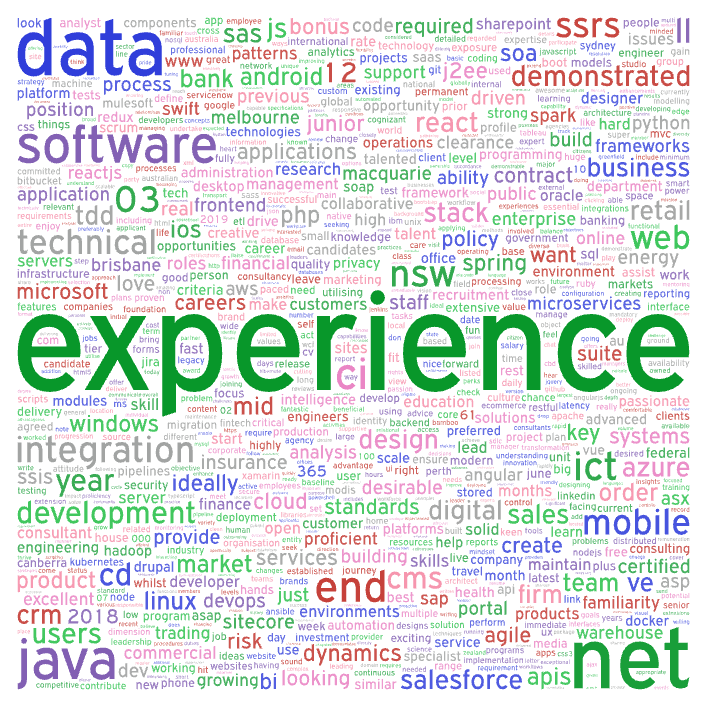

## Part 4 – Discussion. 

## Scenario 1

### Finding a major and related subjects for Tom

In [33]:
high_salary_sectors = data[data['LowestSalary'] >= 80]['Classification'].unique()


queensland_cities = ['Brisbane', 'Gold Coast', 'Sunshine Coast', 'Cairns', 'Townsville', 'Toowoomba', 'Mackay', 'Rockhampton', 'Bundaberg', 'Hervey Bay', 'Gladstone', 'Maryborough', 'Mount Isa', 'Gympie', 'Warwick', 'Dalby', 'Kingaroy', 'Charters Towers', 'Innisfail', 'Emerald', 'Cannonvale', 'Atherton', 'Yeppoon', 'Moranbah', 'Goondiwindi', 'Biloela', 'Stanthorpe', 'Weipa', 'Ayr', 'Roma', 'Charleville', 'Longreach', 'Tully', 'Mareeba', 'Ingham', 'Chinchilla', 'Mossman', 'Bowen', 'Proserpine', 'Childers', 'Oakey', 'Sarina', 'Bargara', 'Gracemere', 'Blackwater', 'Kingston']

# Filter the dataset to include only cities within Queensland
queensland_data = data[data['Location'].isin(queensland_cities)]

print("Cities within Queensland in the dataset:")
print(queensland_data['Location'].unique())


queensland_data_high_salary = queensland_data[queensland_data['LowestSalary'] >= 80]

sector_counts = queensland_data_high_salary['Classification'].value_counts()

best_sector = sector_counts.idxmax()
best_sector_count = sector_counts.max()

print(f"Best sector in Queensland with LowestSalary >= 80K: {best_sector} ({best_sector_count} job postings)")

best_sector_data = queensland_data_high_salary[queensland_data_high_salary['Classification'] == best_sector]
subsector_counts = best_sector_data['SubClassification'].value_counts()

# Print the top subsectors and their counts
print("\nTop subsectors in the best sector:")
print(subsector_counts.head(5))

Cities within Queensland in the dataset:
['Brisbane' 'Sunshine Coast' 'Gold Coast']
Best sector in Queensland with LowestSalary >= 80K: Information & Communication Technology (2067 job postings)

Top subsectors in the best sector:
SubClassification
Developers/Programmers            339
Programme & Project Management    328
Business/Systems Analysts         307
Architects                        184
Testing & Quality Assurance       116
Name: count, dtype: int64


### Answer
The dataset was analysed according to the given scenario. First, as Tom wants a job in the state of Queensland, the Locations in Queensland were filtered from dataset. Job posts from three cities in Queensland were identified in the dataset. Jobs in 'Brisbane', 'Sunshine Coast' and 'Gold Coast' were identified in the dataset.Then the posts from these cities were further filtered to obtain job posts with LowestSalary greater than or equal to 80,000 as Tom wants a job with a salary more than 80,000. Then the best sector was identified by finding the sector with most job posts. To do this, the sector with the max count of job posts was obtained from the filtered dataset. The best sector or classification for the needs of Tom was identified as Information & Communication Technology. This sector had 2067 job postings in the dataset. Therefore, the best major Information & Communication Technology if he wants a job with 80000 or more salary in the state of Queensland. This is a good option because it covers a lot of topics related to computers and technology, which are in high demand. It's like learning the tools and skills needed to work in the tech industry. This will provide him the best chance to get what he wants. Then the top 5 subsectors were identified. For this, the value count of sub sectors with Classification 'Information & Communication Technology' were obtained from the dataset. The top 5 was printed to find the subjects which can be recommended to Tom. The subjects Tom can study can be the subjects related to the top 5 subclassifications. The subclassification with most number of jobs is Developers/Programmers followed by Programme & Project Management, Business/Systems Analysts, Architects, Testing & Quality Assurance. He can also consider subjects like Project Management, which is about learning how to manage big projects, like building software or apps, which is important in the tech industry. Another good subject to choose is Systems Analysis and Design, which is about figuring out what a computer system needs to do and how to make it work well for users, a key skill in tech jobs. Tom can choose subjects like Software Development or Programming. This is about learning how to create computer programs and applications, which is a big need in the tech world. Additionally, Tom can look into subjects like Software Architecture, which is about designing the structure of software systems, deciding how different parts will work together, and Quality Assurance and Testing, which is about making sure that software works correctly and doesn't have any bugs or problems, crucial for making good-quality products.

## Scenario 2
### Student Admission number changes for majors offered by Griffith University

In [34]:
best_sector = sector_counts.idxmax()
worst_sector = sector_counts.idxmin()
print(sector_counts)
print("Major with least job opportunities:",worst_sector)
print("Major with most job opportunities:",best_sector)

Classification
Information & Communication Technology    2067
Healthcare & Medical                      1078
Engineering                                648
Construction                               584
Government & Defence                       498
Education & Training                       361
Legal                                      358
Accounting                                 348
Mining, Resources & Energy                 333
Sales                                      332
Manufacturing, Transport & Logistics       199
Human Resources & Recruitment              183
Trades & Services                          164
Banking & Financial Services               160
Marketing & Communications                 125
Real Estate & Property                      92
Consulting & Strategy                       87
CEO & General Management                    81
Insurance & Superannuation                  68
Administration & Office Support             62
Science & Technology                        5

### Answer

The dataset of job opportunities proided was analaysed to provide recommendations for adjusting admission numbers in each major at Griffith University based on job market data.

The classifications of jobs posted were printed in descending order of number of jobs to find out which classifications are most suitable majors for Griffith University.

Information & Communication Technology: This Classification has the highest job opportunities in the dataset, with 2072 jobs posted. ICT is a field that is fast growing and evolving, with a high demand for skilled professionals due to technological advancements across industries. Therefore this can be a good major to increase admissions.

Farming, Animals & Conservation: This major has the least job opportunities in the given dataset, with only 3 jobs posted. The job market for this field appears to be quite limited, which could have happened due to factors such as automation in agriculture and changing environmental regulations.

Given this analysis, here are the recommendations for adjusting admission numbers:

Majors to Extend:
Information & Communication Technology (ICT) can be a major which Griffith University can extend the number of students the admit. ICT has the highest number of jobs posted according to the dataset. This indicates that a strong demand for professionals is available in this field. Increasing admission numbers would allow more students to pursue careers in the field of ICT which will support the lack of employees for this field which can be seen by analysing the results we obtained. Additionally, ICT skills are highly transferable and applicable across various sectors, providing graduates with diverse career options.

Other than this, Healthcare & Medical, Engineering, Construction can be more majors which has more job opportunities available. Griffith University can increase the intake of students for these majors as well.


Majors to Reduce:
Farming, Animals & Conservation:
Recommendation: Consider reducing admission numbers significantly or completely dropping out the major. The job market for this major is extremely limited, with very few job opportunities available according to this dataset. Students who graduate from this major will have a hard time finding a job with this limited number of job availability. Therefore, students might not even consider enrolling in this major unless they are interested in learning more than finding a job. Griffith University can either reduce the number of admissions for this major or consider completely dropping this.